Author: Davoud Masoumi dmasoumi@ucmerced.edu October 2022

In [1]:
import gizmo_analysis as gizmo
import utilities as ut
import numpy as np
from itertools import chain # to append multiple lists at once

In [2]:
#simname = 'm12i_res7100'                                                         
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12i_res7100'
#part = gizmo.io.Read.read_snapshots(['all'], 'snapshot_index', 600, simulation_directory=simdir, assign_hosts_rotation=True)
simname = 'm12f_res7100_mhdcv'
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/'
snapnumber = 597
part = gizmo.io.Read.read_snapshots(['all'],'snapshot_index', snapnumber, simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)  



# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/snapshot_times.txt

  using snapshot index = 597, redshift = 0.007


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapshot_597.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 81363848 particles
    dark2     (id = 2): 7086235 particles
    gas       (id = 0): 64166200 particles
    star      (id = 4): 17784971 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']
  gas properties: ['density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'position', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapsho

### Step 1: Recovering Rotation Angles

In [3]:
''' read the "True Rotation Matrix": i.e., the Rotation Matrix of the snapshot which is loaded '''

# we use "rot_mat" to represent the "True Rotation Matrix" in our code
rot_mat = part.host['rotation']     

# identifying the elements of the True Rotation Matrix
rot_mat11 = rot_mat[0][0][0]
rot_mat12 = rot_mat[0][0][1]
rot_mat13 = rot_mat[0][0][2]

rot_mat21 = rot_mat[0][1][0]
rot_mat22 = rot_mat[0][1][1]
rot_mat23 = rot_mat[0][1][2]

rot_mat31 = rot_mat[0][2][0]
rot_mat32 = rot_mat[0][2][1]
rot_mat33 = rot_mat[0][2][2]

In [4]:
''' recovering the three rotation angles; note that there are eight possible sets of rotation angles'''

rotation_angles_first = [0, 0, 0]
rotation_angles_first[0] =  - np.arctan(rot_mat32/rot_mat33) 
rotation_angles_first[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2))))
rotation_angles_first[2] =  - np.arctan(rot_mat21/rot_mat11)
    
rotation_angles_second = [0, 0, 0]
rotation_angles_second[0] =  - np.arctan(rot_mat32/rot_mat33)  + np.pi
rotation_angles_second[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2))))
rotation_angles_second[2] =  - np.arctan(rot_mat21/rot_mat11)
    
rotation_angles_third = [0, 0, 0]
rotation_angles_third[0] =  - np.arctan(rot_mat32/rot_mat33)
rotation_angles_third[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + np.pi
rotation_angles_third[2] =  - np.arctan(rot_mat21/rot_mat11)

rotation_angles_fourth = [0, 0, 0]
rotation_angles_fourth[0] =  - np.arctan(rot_mat32/rot_mat33) 
rotation_angles_fourth[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2))))
rotation_angles_fourth[2] =  - np.arctan(rot_mat21/rot_mat11) + np.pi

rotation_angles_fifth = [0, 0, 0]
rotation_angles_fifth[0] =  - np.arctan(rot_mat32/rot_mat33) + np.pi
rotation_angles_fifth[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + np.pi
rotation_angles_fifth[2] =  - np.arctan(rot_mat21/rot_mat11) 

rotation_angles_sixth = [0, 0, 0]
rotation_angles_sixth[0] =  - np.arctan(rot_mat32/rot_mat33) + np.pi
rotation_angles_sixth[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2))))
rotation_angles_sixth[2] =  - np.arctan(rot_mat21/rot_mat11) + np.pi

rotation_angles_seventh = [0, 0, 0]
rotation_angles_seventh[0] =  - np.arctan(rot_mat32/rot_mat33) 
rotation_angles_seventh[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + np.pi
rotation_angles_seventh[2] =  - np.arctan(rot_mat21/rot_mat11) + np.pi

rotation_angles_eighth = [0, 0, 0]
rotation_angles_eighth[0] = - np.arctan(rot_mat32/rot_mat33) + np.pi
rotation_angles_eighth[1] =  - np.arctan(-rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + np.pi
rotation_angles_eighth[2] =  - np.arctan(rot_mat21/rot_mat11) + np.pi
    
rotation_angles = list(chain([rotation_angles_first], [rotation_angles_second], 
                             [rotation_angles_third], [rotation_angles_third], 
                             [rotation_angles_fifth], [rotation_angles_sixth], 
                             [rotation_angles_seventh], [rotation_angles_eighth]))
    
del(rotation_angles_first, rotation_angles_second, rotation_angles_third, 
    rotation_angles_fourth, rotation_angles_fifth, rotation_angles_sixth, 
    rotation_angles_seventh, rotation_angles_eighth)

In [5]:
print(rotation_angles)

[[1.5211467, -0.46477550372683696, -1.2703753], [4.662739308672496, -0.46477550372683696, -1.2703753], [1.5211467, 2.676817149862956, -1.2703753], [1.5211467, 2.676817149862956, -1.2703753], [4.662739308672496, 2.676817149862956, -1.2703753], [4.662739308672496, -0.46477550372683696, 1.8712174018197736], [1.5211467, 2.676817149862956, 1.8712174018197736], [4.662739308672496, 2.676817149862956, 1.8712174018197736]]


In [6]:
''' 
Finding the "True Rotation Angles" 

We use the following approach to know which set of rotation angles is the "True Rotation Angles" set.
For each of the eight possible sets of rotation angles, 
we compute the rotation matrix (let's call it the Recovered Rotation Matrix), 
and we check which of these "Recovered Rotation Matrices" matches the "True Rotation Matrix."

'''

# True Rotation Matrix: rot_mat
# True Rotation Angles: theta_0, theta_1, theta_2

# Recovered Rotation Matrix: rm
# Recovered Rotation Matrix: rotation_angle0, rotation_angle1, rotation_angle2

# we check which Recovered Rotation Matrix matches the True Rotation Matrix

theta_0 = [] 
theta_1 = []
theta_2 = []

for i in range (len(rotation_angles)):

    rm11 = np.cos(rotation_angles[i][1]) * np.cos(rotation_angles[i][2])
    rm12 = np.cos(rotation_angles[i][0]) * np.sin(rotation_angles[i][2]) + np.sin(rotation_angles[i][0]) * np.sin(rotation_angles[i][1]) * np.cos(rotation_angles[i][2])
    rm13 = np.sin(rotation_angles[i][0]) * np.sin(rotation_angles[i][2]) - np.cos(rotation_angles[i][0]) * np.sin(rotation_angles[i][1]) * np.cos(rotation_angles[i][2])
    rm21 = -np.cos(rotation_angles[i][1]) * np.sin(rotation_angles[i][2])
    rm22 = np.cos(rotation_angles[i][0]) * np.cos(rotation_angles[i][2]) - np.sin(rotation_angles[i][0]) * np.sin(rotation_angles[i][1]) * np.sin(rotation_angles[i][2])
    rm23 = np.sin(rotation_angles[i][0]) * np.cos(rotation_angles[i][2]) + np.cos(rotation_angles[i][0]) * np.sin(rotation_angles[i][1]) * np.sin(rotation_angles[i][2])
    rm31 = np.sin(rotation_angles[i][1])
    rm32 = -np.sin(rotation_angles[i][0]) * np.cos(rotation_angles[i][1])
    rm33 = np.cos(rotation_angles[i][0]) * np.cos(rotation_angles[i][1])

    if ((np.round(rm11.astype('float64'), 3) == np.round(rot_mat11.astype('float64'), 3)) & 
        (np.round(rm12.astype('float64'), 3) == np.round(rot_mat12.astype('float64'), 3)) & 
        (np.round(rm13.astype('float64'), 3) == np.round(rot_mat13.astype('float64'), 3)) &
        (np.round(rm21.astype('float64'), 3) == np.round(rot_mat21.astype('float64'), 3)) &
        (np.round(rm22.astype('float64'), 3) == np.round(rot_mat22.astype('float64'), 3)) &
        (np.round(rm23.astype('float64'), 3) == np.round(rot_mat23.astype('float64'), 3)) &
        (np.round(rm31.astype('float64'), 3) == np.round(rot_mat31.astype('float64'), 3)) &
        (np.round(rm32.astype('float64'), 3) == np.round(rot_mat32.astype('float64'), 3)) &
        (np.round(rm33.astype('float64'), 3) == np.round(rot_mat33.astype('float64'), 3))):

        theta_0.append(rotation_angles[i][0])
        theta_1.append(rotation_angles[i][1])
        theta_2.append(rotation_angles[i][2])

        break
del(rotation_angles)

In [7]:
theta_0, theta_1, theta_2

([], [], [])

### Step 2: Constructing the Loebman Lab Transformation Matrix

In [8]:
'''
Compute the Loebman Lab Transformation Matrix

To construct this matrix, we use theta_0 and theta_1.
Notice that for this transformation matrix, we set theta_2 = 0.
Due to this, we can simplify the generic form of the rotation matrix,
reducing it to the following expressions.
'''

# we use "L" for the Loebman Lab Transformation Matrix

L11 = np.cos(theta_1)
L12 = np.sin(theta_0) * np.sin(theta_1)
L13 = - np.cos(theta_0) * np.sin(theta_1)
L21 = np.zeros(1)
L22 = np.cos(theta_0)
L23 = np.sin(theta_0) 
L31 = np.sin(theta_1)
L32 = -np.sin(theta_0) * np.cos(theta_1)
L33 = np.cos(theta_0) * np.cos(theta_1)

In [9]:
print(L11, L12, L13, L21, L22, L23, L31, L32, L33)

[] [] [] [0.] [] [] [] [] []


### Step 3: Converting the Position of Stars from the "Translated Box Coordinate Frame" to the "Loebman Lab Coordinate Frame"

In [10]:
# we pick the position of very young stars (age < 0.5 Gyrs) from the loaded simulation

# x_young, y_young, z_young: position of very young stars with respect to the "TRANSLATED BOX COORDINATE FRAME"
# x_young_LL, y_young_LL, z_young_LL: position of very young stars with respect to the "LOEBMAN LAB COORDINATE FRAME"

mask = np.where(part['star'].prop('age') < 1)

x_young = part['star'].prop('host.distance')[:,0][mask]
y_young = part['star'].prop('host.distance')[:,1][mask]
z_young = part['star'].prop('host.distance')[:,2][mask]

x_young_LL = (L11*x_young) + (L12*y_young) + (L13*z_young)
y_young_LL = (L21*x_young) + (L22*y_young) + (L23*z_young)
z_young_LL = (L31*x_young) + (L32*y_young) + (L33*z_young)

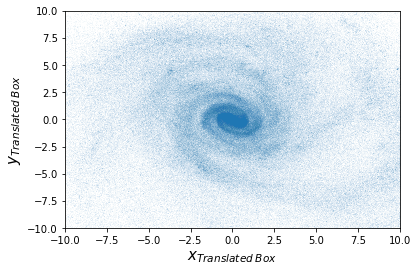

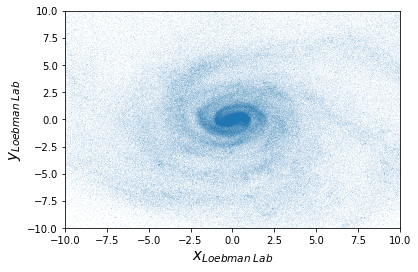

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x_young, y_young, s=0.0001)
plt.xlabel('$x_{Translated\; Box}$', fontsize=15)
plt.ylabel('$y_{Translated\; Box}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

plt.scatter(x_young_LL, y_young_LL, s=0.0001)
plt.xlabel('$x_{Loebman\; Lab}$', fontsize=15)
plt.ylabel('$y_{Loebman\; Lab}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
